<a href="https://colab.research.google.com/github/MDMohaymenUlAnam/CSE-4554-Machine-Learning/blob/main/190042142_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Task 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Task2
y = np.array(df['Outcome'])
X = np.array(df.drop(['Outcome'],axis=1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=42)

In [ ]:
# Task 3

from sklearn.naive_bayes import GaussianNB
cl = GaussianNB()
cl.fit(X_train,y_train)
y_pred = cl.predict(X_test)
print(y_pred)

[0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]


              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

[[119  32]
 [ 27  53]]


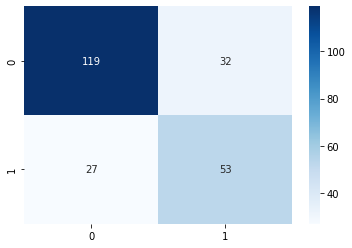

In [ ]:
# Task 4
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt="d",cmap="Blues")


              precision    recall  f1-score   support

           0       0.84      0.72      0.77       151
           1       0.58      0.75      0.66        80

    accuracy                           0.73       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.75      0.73      0.73       231

[[108  43]
 [ 20  60]]


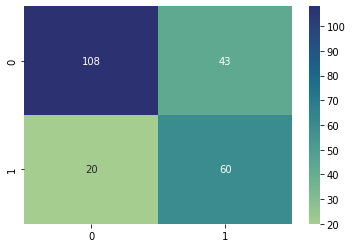

In [ ]:
# Task 5

from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier(random_state = 0,criterion = 'entropy', max_depth= 4)
cl.fit(X_train,y_train)
y_pred = cl.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt="d",cmap="crest")

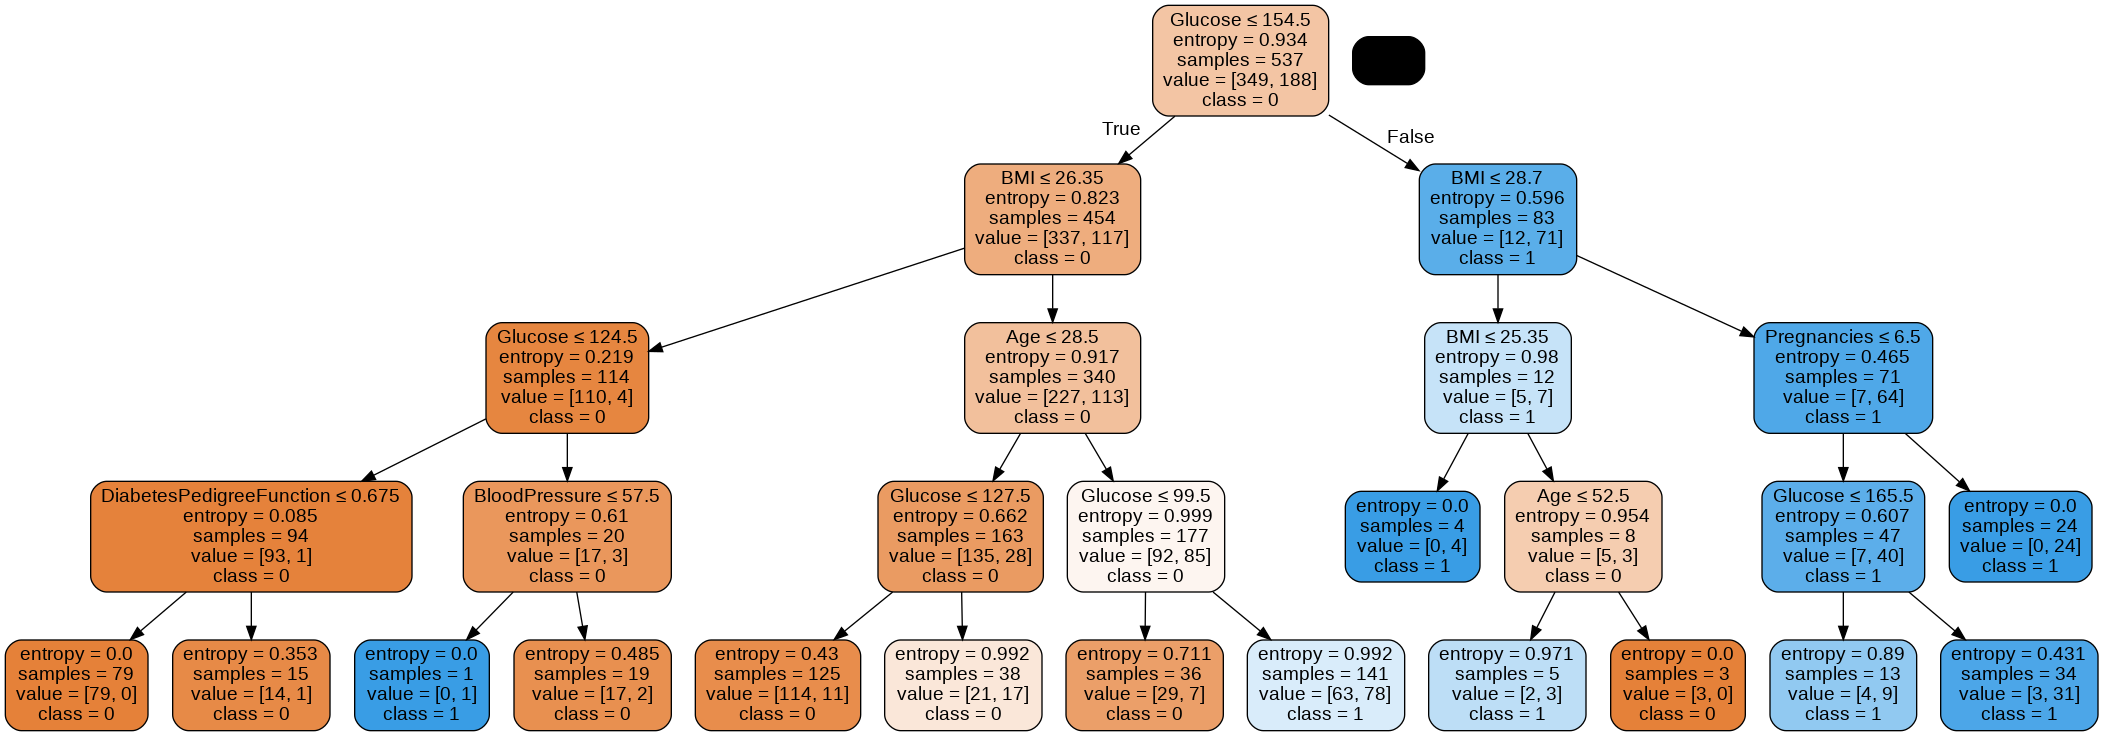

In [ ]:
# Task6

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(cl, out_file=dot_data, filled=True, rounded=True,
                special_characters = True, feature_names = df.columns[:-1], class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

[[121  30]
 [ 30  50]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


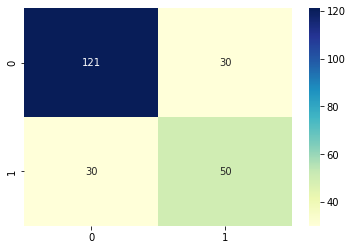

In [ ]:
# Task7

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt="d",cmap="YlGnBu")


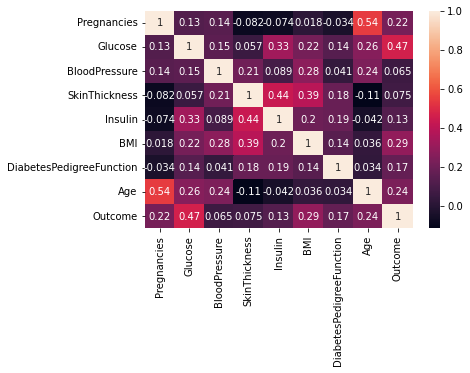

In [ ]:
# Task 8
dataplot = sns.heatmap(df.corr(),annot =True)
# age and pregnencies have the highest correlation

              precision    recall  f1-score   support

           0       0.63      0.85      0.73       142
           1       0.47      0.21      0.29        89

    accuracy                           0.61       231
   macro avg       0.55      0.53      0.51       231
weighted avg       0.57      0.61      0.56       231

[[121  21]
 [ 70  19]]


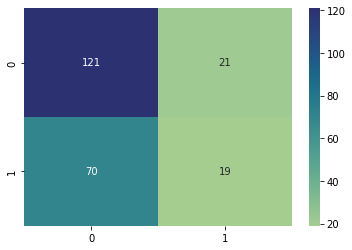

In [ ]:
y = np.array(df['Outcome'])
X = np.array(df[['Age','Pregnancies']])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=40)
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt="d",cmap="crest")



In [ ]:
print(log.coef_)
print(log.intercept_)


[[0.02690609 0.10249073]]
[-2.00881953]
